In [1]:
!git config user.email "naazshafeer@gmail.com"
!git config user.name "Naaz Shafeer"

In [21]:
pip install moviepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 6.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 31.8 MB/s eta 0:00:0000:0100:01
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110728 sha256=77a2aaff13f8fc82ca784fc2285d3e1d5d8d0d3bd0e19641353b656b00dca141
  Stored in directory: /Users/naazshafeer/Library/Caches/pip/wheels/29/15/e4/4f790bec6acd51a00b67e8ee1394f0bc6e0135c315f8ff399a
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
Note: you may need to restart the kernel to use updated packages.


Modelling 2-Body Problem 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import scipy as sci
from scipy import integrate
from scipy.integrate import odeint
from matplotlib.patches import Ellipse
#astropy.units - 

In [40]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Define masses
m1=10e7 * 1.989e30 #mass of black hole A 
m2=10e8 * 1.989e30 #mass of black hole B
#Define initial position vectors
r1=[-0.5e14,0,0] #m
r2=[0.5e14,0,0] #m (convert these into actual meters instead of the reference used in last code block)
#Convert pos vectors to arrays
r1=np.array(r1,dtype="float64")
r2=np.array(r2,dtype="float64")
#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)
#Define initial velocities
v1=[0,1e7, 0] #m/s
v2=[0,-1e7,0] #m/s
#Convert velocity vectors to arrays
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

#Now inputting Kepler's third law (to get the right orbital period, and fit ellipses, later)
r = np.linalg.norm(r2 - r1) #this is the Euclidean way to calculate distance, it is also used to find the potential energy
T = 2 * np.pi * np.sqrt(r**3 / (G * (m1 + m2))) # we can extract a from here
a = ((T**2 * G * (m1+m2)) / (4 * np.pi**2))**(1/3)


print (f"Semi-major axis: {a} meters") # checking, damn its a big number (probably becuase of distance between the bh's)

Semi-major axis: 99999999999999.83 meters


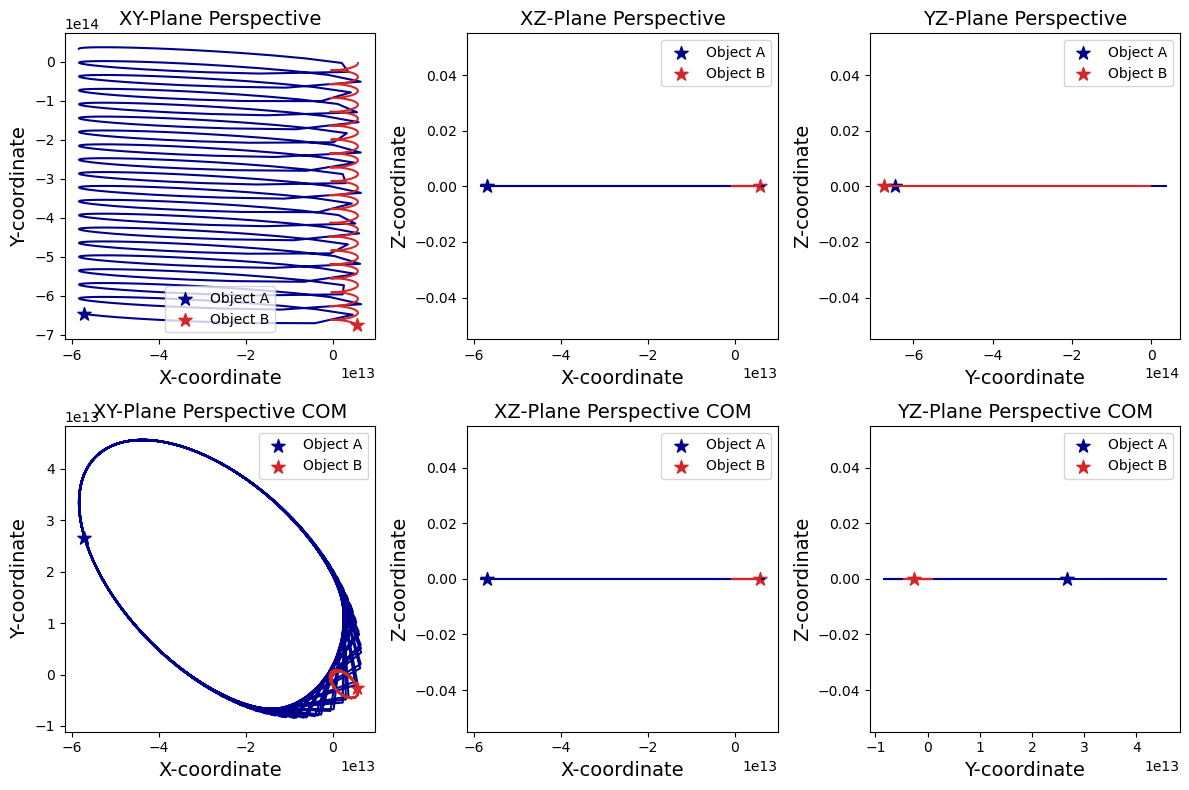

[[-5.83669772e+13  3.34671062e+13  0.00000000e+00]
 [-5.80874732e+13  3.62976569e+13  0.00000000e+00]
 [-5.72689011e+13  3.87915482e+13  0.00000000e+00]
 ...
 [-5.30730479e+13  1.86841680e+13  0.00000000e+00]
 [-5.54680880e+13  2.28133224e+13  0.00000000e+00]
 [-5.70945263e+13  2.66275940e+13  0.00000000e+00]]
[[ 3.64521595e-03  2.43014397e-03  0.00000000e+00]
 [ 3.64521595e-03 -1.34799944e+12  0.00000000e+00]
 [ 4.86028793e-03 -2.69599889e+12  0.00000000e+00]
 ...
 [-4.92043400e+01 -6.69955724e+14  0.00000000e+00]
 [-4.93264547e+01 -6.71303723e+14  0.00000000e+00]
 [-4.94503920e+01 -6.72651723e+14  0.00000000e+00]]


In [64]:
#A function defining the equations of motion 
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    r=np.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    dv1bydt=G*m2*(r2-r1)/r**3
    dv2bydt=G*m1*(r1-r2)/r**3
    dr1bydt=v1
    dr2bydt=v2
    r_derivs=np.concatenate((dr1bydt,dr2bydt))
    derivs=np.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs
# check what w and t is in the code
#Package initial parameters
init_params=np.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=np.linspace(0, 5 * T,500) #8 orbital periods and 500 points #polar coordinates - [update] had to change
#this orbital period to 1 year in seconds (didnt know what to do so i asked chatgpt)


two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2)) #make sure to understand what is within this variable

r1_sol = two_body_sol[:, :3]
r2_sol = two_body_sol[:, 3:6]

#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)

r1com_sol=r1_sol-rcom_sol

r2com_sol=r2_sol-rcom_sol  #there is problem with viewpoint, i can only see things in teh COM viewpoint
#cannot trace the pathway of the orbit

#Create figure
fig, axs = plt.subplots(2, 3, figsize=(12, 8)) #looked at article to see how I can line up three differnt persepctives in a row

# region Code Snippet 1: Plot the orbits for XY plane (0,1) in indices
axs[0,0].plot(r1_sol[:,0],r1_sol[:,1],color="darkblue")
axs[0,0].plot(r2_sol[:,0],r2_sol[:,1],color="tab:red")
axs[0,0].scatter(r1_sol[-1,0],r1_sol[-1,1],color="darkblue",marker="*",s=100,label="Object A")
axs[0,0].scatter(r2_sol[-1,0],r2_sol[-1,1],color="tab:red",marker="*",s=100,label="Object B")
axs[0,0].set_xlabel("X-coordinate",fontsize=14)
axs[0,0].set_ylabel("Y-coordinate",fontsize=14)
axs[0,0].set_title("XY-Plane Perspective",fontsize=14)
axs[0,0].legend()
# endregion

# region Code Snippet 2: Plot the orbits for XZ plane (0,2) in indices
axs[0,1].plot(r1_sol[:,0],r1_sol[:,2],color="darkblue")
axs[0,1].plot(r2_sol[:,0],r2_sol[:,2],color="tab:red")
axs[0,1].scatter(r1_sol[-1,0],r1_sol[-1,2],color="darkblue",marker="*",s=100,label="Object A")
axs[0,1].scatter(r2_sol[-1,0],r2_sol[-1,2],color="tab:red",marker="*",s=100,label="Object B")
axs[0,1].set_xlabel("X-coordinate",fontsize=14)
axs[0,1].set_ylabel("Z-coordinate",fontsize=14)
axs[0,1].set_title("XZ-Plane Perspective",fontsize=14)
axs[0,1].legend()
# endregion

# region Code Snippet 3: Plot the orbits for YZ plane (1,2) in indices
axs[0,2].plot(r1_sol[:,1],r1_sol[:,2],color="darkblue")
axs[0,2].plot(r2_sol[:,1],r2_sol[:,2],color="tab:red")
axs[0,2].scatter(r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="*",s=100,label="Object A")
axs[0,2].scatter(r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="*",s=100,label="Object B")
axs[0,2].set_xlabel("Y-coordinate",fontsize=14)
axs[0,2].set_ylabel("Z-coordinate",fontsize=14)
axs[0,2].set_title("YZ-Plane Perspective",fontsize=14)
axs[0,2].legend()
# endregion

# region Code Snippet 4: Plot the orbits for XY plane (0,1) in indices but COM
axs[1,0].plot(r1com_sol[:,0],r1com_sol[:,1],color="darkblue")
axs[1,0].plot(r2com_sol[:,0],r2com_sol[:,1],color="tab:red")
axs[1,0].scatter(r1com_sol[-1,0],r1com_sol[-1,1],color="darkblue",marker="*",s=100,label="Object A")
axs[1,0].scatter(r2com_sol[-1,0],r2com_sol[-1,1],color="tab:red",marker="*",s=100,label="Object B")
axs[1,0].set_xlabel("X-coordinate",fontsize=14)
axs[1,0].set_ylabel("Y-coordinate",fontsize=14)
axs[1,0].set_title("XY-Plane Perspective COM",fontsize=14)
axs[1,0].legend()
# endregion

# region Code Snippet 5: Plot the orbits for XZ plane (0,2) in indices but COM
axs[1,1].plot(r1com_sol[:,0],r1com_sol[:,2],color="darkblue")
axs[1,1].plot(r2com_sol[:,0],r2com_sol[:,2],color="tab:red")
axs[1,1].scatter(r1com_sol[-1,0],r1com_sol[-1,2],color="darkblue",marker="*",s=100,label="Object A")
axs[1,1].scatter(r2com_sol[-1,0],r2com_sol[-1,2],color="tab:red",marker="*",s=100,label="Object B")
axs[1,1].set_xlabel("X-coordinate",fontsize=14)
axs[1,1].set_ylabel("Z-coordinate",fontsize=14)
axs[1,1].set_title("XZ-Plane Perspective COM",fontsize=14)
axs[1,1].legend()
# endregion

# region Code Snippet 6: Plot the orbits for YZ plane (1,2) in indices but COM
axs[1,2].plot(r1com_sol[:,1],r1com_sol[:,2],color="darkblue")
axs[1,2].plot(r2com_sol[:,1],r2com_sol[:,2],color="tab:red")
axs[1,2].scatter(r1com_sol[-1,1],r1com_sol[-1,2],color="darkblue",marker="*",s=100,label="Object A")
axs[1,2].scatter(r2com_sol[-1,1],r2com_sol[-1,2],color="tab:red",marker="*",s=100,label="Object B")
axs[1,2].set_xlabel("Y-coordinate",fontsize=14)
axs[1,2].set_ylabel("Z-coordinate",fontsize=14)
axs[1,2].set_title("YZ-Plane Perspective COM",fontsize=14)
axs[1,2].legend()
# endregion

plt.tight_layout() 
plt.show()

print(r1com_sol)
print(rcom_sol)
#make sure to check that the energy is conserved in all of these simulations

In [62]:


p_index = np.argmin(r2com_sol) #two different outputs : 
a_index = np.argmax(r2com_sol)

p_pos = r2com_sol[p_index]
a_pos = r2com_sol[a_index]

p_distance = r2com_sol[p_index]
a_distance = r2com_sol[a_index] #culmination of code to find largest distance apart and assign it to p and a respectively

r_p = p_distance
r_a = a_distance #now we can input the equation for eccentricity

eccentricity2 = (r_a - r_p) / (r_a +r_p)


#function for semi-minor axis:

b = a * np.sqrt(1 - eccentricity2**2)

print(f"Eccentricity of the orbit: {eccentricity2}") #WOOOOOOOH IT IS  0 < EPSILON < 1 !!!!
print(f"Semi-Minor Axis of the orbit: {b}")

Eccentricity of the orbit: [ 0.02556486 -1.                 nan]
Semi-Minor Axis of the orbit: [9.99673166e+13 0.00000000e+00            nan]


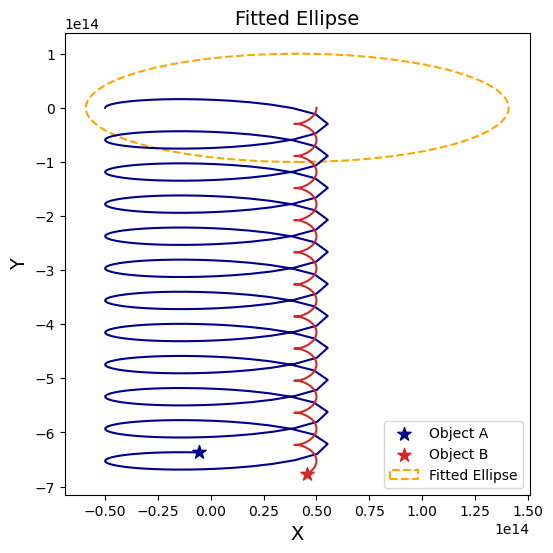

In [57]:
#fitting ellipses function to this

def plot_ellipse(ax, center, a, b, angle=0, **kwargs):
    e = Ellipse(xy=center, width=2*a, height=2*b, angle=angle, **kwargs) #maybe something to do with the fact that the variable center should be COM?
    ax.add_patch(e)


fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(r1_sol[:, 0], r1_sol[:, 1], color="darkblue")
ax.plot(r2_sol[:, 0], r2_sol[:, 1], color="tab:red")
ax.scatter(r1_sol[-1, 0], r1_sol[-1, 1], color="darkblue", marker="*", s=100, label="Object A")
ax.scatter(r2_sol[-1, 0], r2_sol[-1, 1], color="tab:red", marker="*", s=100, label="Object B")


plot_ellipse(ax, center=r_com[:2], a=a, b=a, edgecolor='orange', facecolor='none', linestyle='--', linewidth=1.5, label='Fitted Ellipse') #not coming out as i expected?

ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Y", fontsize=14)
ax.set_title("Fitted Ellipse", fontsize=14)
ax.legend()
plt.show()


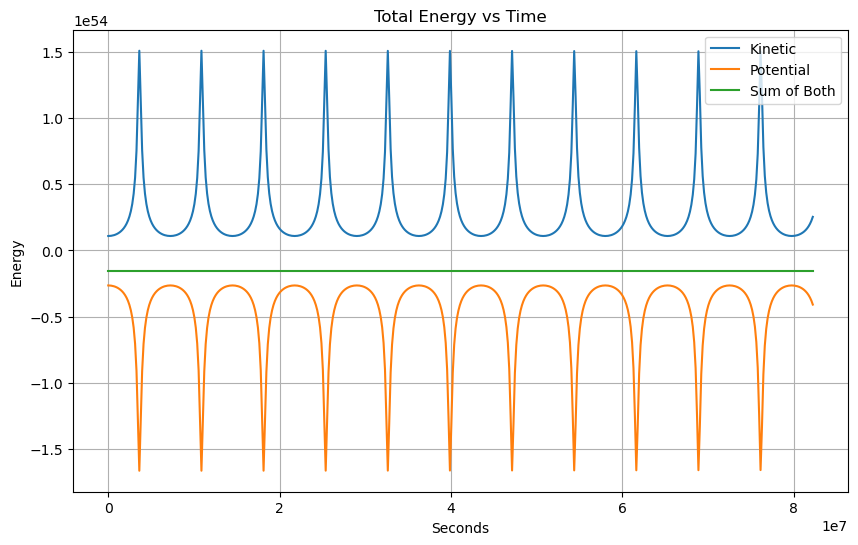

In [58]:
v1_sol = two_body_sol[:, 6:9]
v2_sol = two_body_sol[:, 9:12]

KE = 0.5 * m1 * np.sum(v1_sol**2, axis=1) + 0.5 * m2 * np.sum(v2_sol**2, axis=1)
V = -G * m1 * m2 / d
E = V + KE

dE_dt = np.gradient(E, time_span)


# region Code Snippet 6: Energy Graph Plot
plt.figure(figsize=(10, 6))
plt.plot(time_span, KE, label="Kinetic")
plt.plot(time_span, V, label = "Potential") 
plt.plot(time_span, E, label = "Sum of Both")
plt.xlabel("Seconds")
plt.ylabel("Energy")
plt.title("Total Energy vs Time")
plt.legend()
plt.grid()
plt.show()
# endregion

- review on the part where the switch from com to keplers thrid law (???)
- fit the ellpise equation to the orbit and then extract the semi major axis from teh orbit and plug into this formula and plot like a (did not work as I wanted to)
- output two numbers (be careful with the units) 
- calculate two different periods, sine they orbit the com separately
- chi2


- convert from angle to time correctly (find another way other than keplers law)


KeyboardInterrupt: 

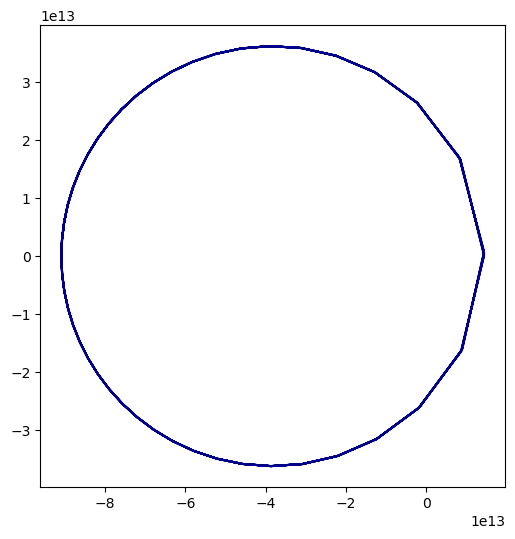

In [59]:
import moviepy
from moviepy.editor import ImageSequenceClip
import os
frames_dir = "frames"
if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)

# Generate frames
for i, (r1, r2) in enumerate(zip(r1com_sol, r2com_sol)):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(r1com_sol[:i+1, 0], r1com_sol[:i+1, 1], color="darkblue")
    ax.plot(r2com_sol[:i+1, 0], r2com_sol[:i+1, 1], color="tab:red")
    ax.scatter(r1[0], r1[1], color="darkblue", marker="*", s=100, label="Object A")
    ax.scatter(r2[0], r2[1], color="tab:red", marker="*", s=100, label="Object B")
    ax.set_xlabel("X-coordinate", fontsize=14)
    ax.set_ylabel("Y-coordinate", fontsize=14)
    ax.set_title("XY-Plane Perspective COM", fontsize=14)
    ax.legend()
    plt.savefig(f"{frames_dir}/frame_{i:04d}.png")
    plt.close()

print("Frames generated.")

In [ ]:
# Create a movie from the frames
frames = [f"{frames_dir}/frame_{i:04d}.png" for i in range(len(r1com_sol))]
clip = ImageSequenceClip(frames, fps=24) # You can adjust fps (frames per second)

# Save the movie
clip.write_videofile("black_hole_orbits.mp4", codec='libx264')


Moviepy - Building video black_hole_orbits.mp4.
Moviepy - Writing video black_hole_orbits.mp4



TypeError: must be real number, not NoneType

TypeError: object of type 'numpy.float64' has no len()

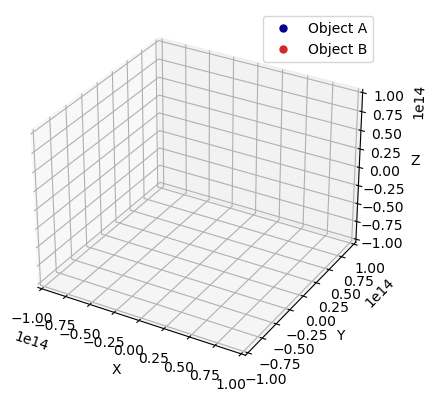

In [ ]:


# Create figure for animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize the plot
point1 = ax.plot([], [], [], 'o', color='darkblue', markersize=5, label='Object A')[0]
point2 = ax.plot([], [], [], 'o', color='tab:red', markersize=5, label='Object B')[0]

# Set plot limits
ax.set_xlim([-1e14, 1e14])
ax.set_ylim([-1e14, 1e14])
ax.set_zlim([-1e14, 1e14])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Update function for animation
def update(num, r1_sol, r2_sol, point1, point2):
    point1.set_data(r1_sol[num, 0], r1_sol[num, 1])
    point1.set_3d_properties(r1_sol[num, 2])
    point2.set_data(r2_sol[num, 0], r2_sol[num, 1])
    point2.set_3d_properties(r2_sol[num, 2])
    return point1, point2

# Create animation
anim = FuncAnimation(fig, update, frames=len(time_span), fargs=(r1_sol, r2_sol, point1, point2), interval=50, blit=True)

plt.show()

from matplotlib.animation import FFMpegWriter

# Save the animation
writer = FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)
anim.save("black_hole_orbits.mp4", writer=writer)





NameError: name 'R1_rel_COG' is not defined

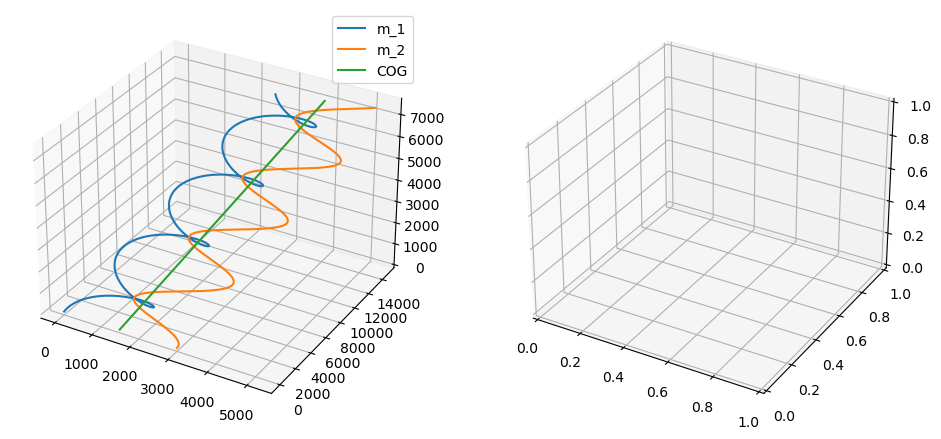

In [ ]:
import numpy as np

G = 6.67430e-20  # km**3/(kg * s**2)
m_1 = m_2 = 1.0e26  # kg

R_1_0 = np.array((0, 0, 0))  # km
R_2_0 = np.array((3000, 0, 0))  # km
dotR_1_0 = np.array((10, 20, 30))  # km/s
dotR_2_0 = np.array((0, 40, 0))  # km/s

y_0 = np.hstack((R_1_0, R_2_0, dotR_1_0, dotR_2_0))

X_1 = y_0[0]
Y_1 = y_0[1]
Z_1 = y_0[2]
X_2 = y_0[3]
Y_2 = y_0[4]
Z_2 = y_0[5]

r = np.sqrt((X_2 - X_1) ** 2 + (Y_2 - Y_1) ** 2 + (Z_2 - Z_1) ** 2)

ddotX_1 = G * m_2 * (X_2 - X_1) / r**3
ddotY_1 = G * m_2 * (Y_2 - Y_1) / r**3
ddotZ_1 = G * m_2 * (Z_2 - Z_1) / r**3
ddotX_2 = -G * m_1 * (X_2 - X_1) / r**3
ddotY_2 = -G * m_1 * (Y_2 - Y_1) / r**3
ddotZ_2 = -G * m_1 * (Z_2 - Z_1) / r**3

R_1 = y_0[:3]
R_2 = y_0[3:6]

r = np.sqrt(np.sum(np.square(R_2 - R_1)))
ddot = G * (R_2 - R_1) / r**3
ddotR_1_0 = m_2 * ddot
ddotR_2_0 = -m_1 * ddot

Delta_t = 1  # s
dotR_1_1 = ddotR_1_0 * Delta_t + dotR_1_0
dotR_2_1 = ddotR_2_0 * Delta_t + dotR_2_0

R_1_1 = dotR_1_0 * Delta_t + R_1_0
R_2_1 = dotR_2_0 * Delta_t + R_2_0

import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def absolute_motion(t, y):
    """Calculate the motion of a two-body system in an inertial reference frame.

    The state vector ``y`` should be in the order:

    1. Coordinates of $m_1$
    2. Coordinates of $m_2$
    3. Velocity components of $m_1$
    4. Velocity components of $m_2$
    """
    # Get the six coordinates for m_1 and m_2 from the state vector
    R_1 = y[:3]
    R_2 = y[3:6]

    # Fill the derivative vector with zeros
    ydot = np.zeros_like(y)

    # Set the first 6 elements of the derivative equal to the last
    # 6 elements of the state vector, which are the velocities
    ydot[:6] = y[6:]

    # Calculate the acceleration terms and fill them in to the rest
    # of the derivative array
    r = np.sqrt(np.sum(np.square(R_2 - R_1)))
    ddot = G * (R_2 - R_1) / r**3
    ddotR_1 = m_2 * ddot
    ddotR_2 = -m_1 * ddot

    ydot[6:9] = ddotR_1
    ydot[9:] = ddotR_2
    return ydot


t_0 = 0  # seconds
t_f = 480  # seconds
t_points = np.linspace(t_0, t_f, 1000)

sol = solve_ivp(absolute_motion, [t_0, t_f], y_0, t_eval=t_points)

y = sol.y.T
R_1 = y[:, :3]  # km
R_2 = y[:, 3:6]  # km
V_1 = y[:, 6:9]  # km/s
V_2 = y[:, 9:]  # km/s
barycenter = (m_1 * R_1 + m_2 * R_2) / (m_1 + m_2)  # km

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection="3d")
ax1.plot(R_1[:, 0], R_1[:, 1], R_1[:, 2], label="m_1")
ax1.plot(R_2[:, 0], R_2[:, 1], R_2[:, 2], label="m_2")
ax1.plot(barycenter[:, 0], barycenter[:, 1], barycenter[:, 2], label="COG")
ax1.legend()

ax2 = fig.add_subplot(132, projection="3d")
ax2.plot(R1_rel_COG[:, 0], R1_rel_COG[:, 1], R1_rel_COG[:, 2], label="m_1")
ax2.plot(R2_rel_COG[:, 0], R2_rel_COG[:, 1], R2_rel_COG[:, 2], label="m_2")
ax2.plot(0, 0, 0, "ro", label="COG")
ax2.legend()

ax3 = fig.add_subplot(133, projection="3d")
ax3.plot(R2_rel_R1[:, 0], R2_rel_R1[:, 1], R2_rel_R1[:, 2], label="m_2")
ax3.plot(COG_rel_R1[:, 0], COG_rel_R1[:, 1], COG_rel_R1[:, 2], label="COG")
ax3.plot(0, 0, 0, "ro", label="m_1")
ax3.legend()

plt.show()


